# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [7]:
df = pd.read_csv(r"C:\Users\aweso\Downloads\foodhub_order.csv")

In [8]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
df.shape

(1898, 9)

#### Observations: 
* The dataframe has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* The datatypes of the different columns in the dataset include the integer type of which the columns 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' are a part of. 
* The floating type is also present of which the column 'cost_of_the_order' is a part of. 
* Lastly, the object datatype is also present of which the columns 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' are a part of. 
* The total memory usage of the dataset is also 133.6 KB. 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
* There are no missing values within the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: 
* The time it takes for food preparation to completes ranges between 20 to 35 minutes, with the average time being around 27 minutes to complete food preparation.


### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 
* There are a total of 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [14]:
df['order_id'].nunique() 

1898

#### Observations: 
* There are a total of 1898 unique orders. 

#### Customer ID

In [15]:
df['customer_id'].nunique()

1200

#### Observations: 
* There are a total of 1200 unique customer IDs.

#### Restaurant Name

In [16]:
df['restaurant_name'].nunique()

178

#### Observations: 
* There are a total of 178 unique restaurants. 

In [17]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: 
* Diving in deeper into the difference between the restaurants, we can notice that Shake Shack receives the highest number of orders at a total of 219 orders.

#### Cuisine Type

In [18]:
df['cuisine_type'].nunique()

14

#### Observations: There are a total of 14 unique cuisine types in the dataset.

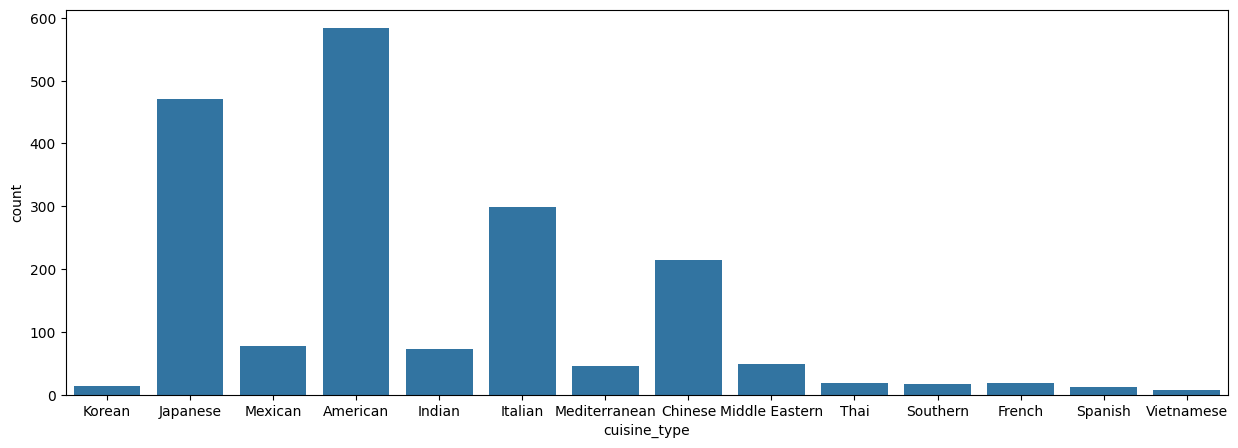

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');

#### Observations: 
* As per the diagram, the distribution of cuisine types is not equally distributed and the highest frequented cuisine types as per the dataset is American, followed by Japanese and Italian. 
* Additionally, the least popular cuisine type among the dataset appears to be Vietnamese. 

#### Cost of the Order

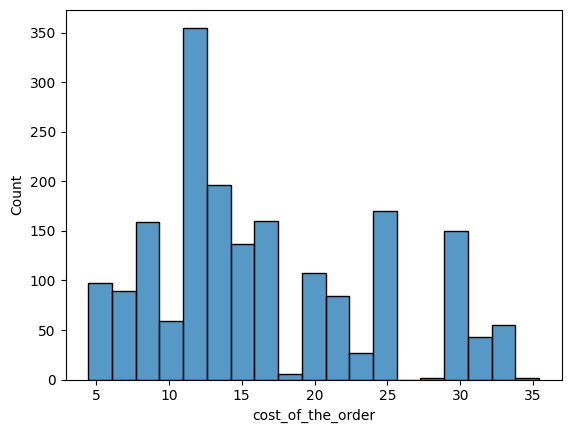

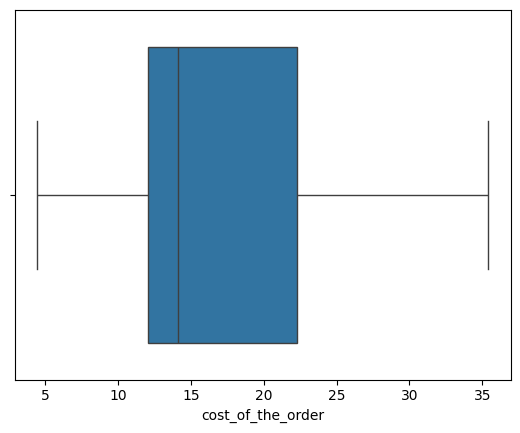

In [25]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations: 
* As per the boxplot, the average cost of the order is greater than the median cost, which indicates that the distribution for this specific variable is skewed to the right. 
* Looking at the histogram, the mode of the distribution appears to be between 10-12 dollars, indicating that this price is popular among customers. 
* Additionally, the outliers include orders greater than 30 dollars, leading to the distribution of this variable being skewed to the right.

#### Day of the Week

In [26]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

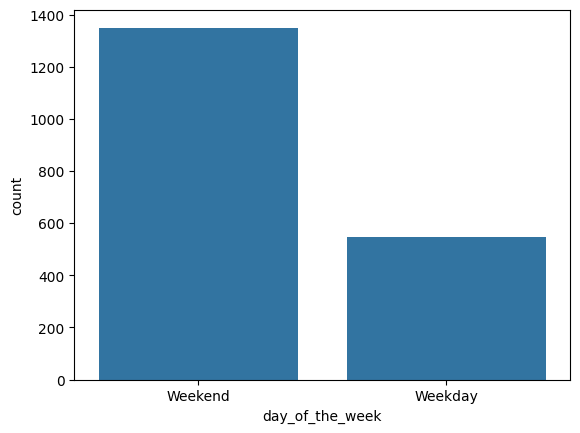

In [27]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Observations: 
* The 'day_of_the_week' variable contains 2 unique values in its' columns - Weekday and Weekend. 
* Additionally, the count plot of this varaible shows that the number of orders placed on the weekends is over double the number of orders placed on weekdays. 

#### Rating

In [28]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

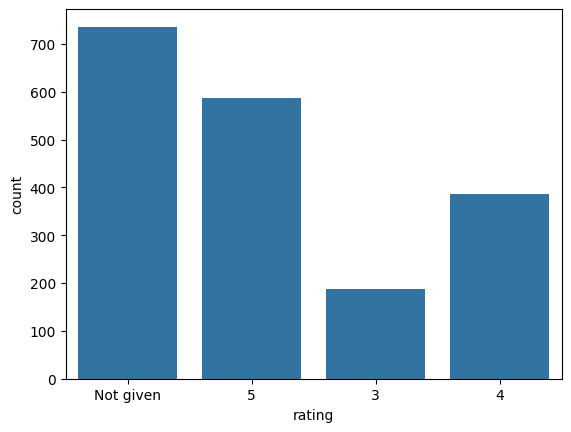

In [72]:
sns.countplot(data = df, x = 'rating')

#### Observations: 
* The most frequent rating category as per the data for the variable 'rating' is 'not given', followed by '5', '4', and then '3'. 

#### Food Preparation Time

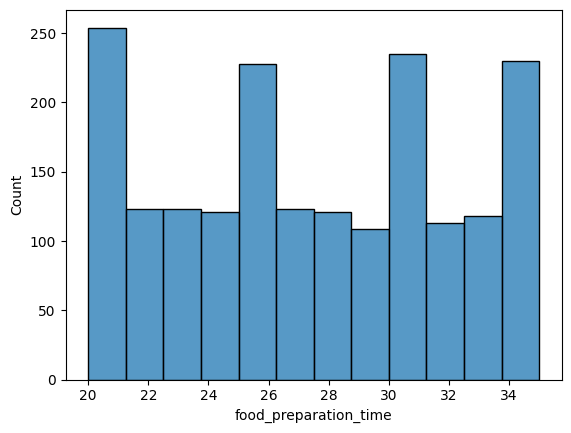

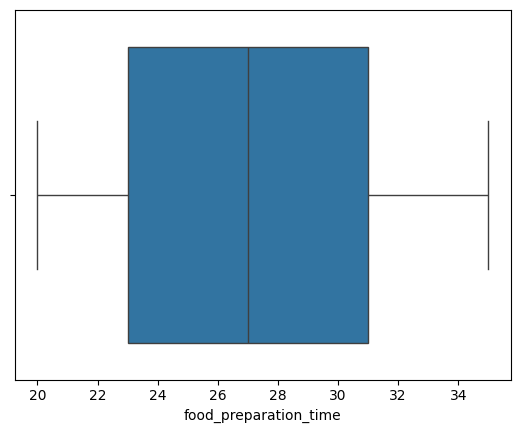

In [30]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations: 
* Looking at the boxplot, the average food preparation time is almost the same as the median food preparation time, indicating a normal distribution. 
* There are no outliers present in this column and the food preparation time ranges between 20 to 35 minutes. 

#### Delivery Time

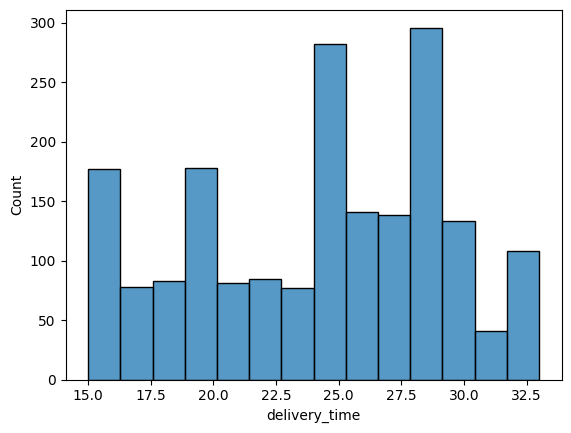

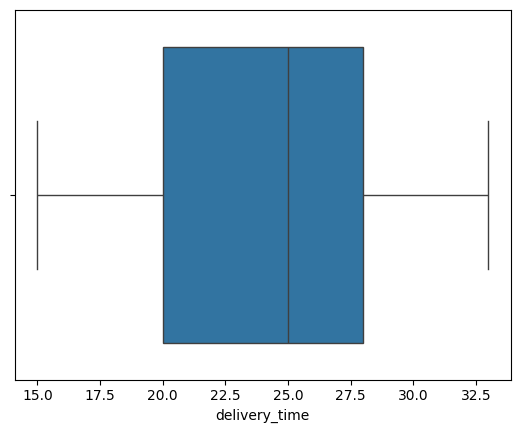

In [31]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations: 
* Looking at the boxplot, the average delivery time is slightly smaller than the median delivery time, indicating a distribution that is skewed to the left for this column. 
* There are no outliers present in this column and the delivery times range between 15 to 33 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [32]:
df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
* The top 5 restaurants in terms of the number of orders received are 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', and 'Parm'. 


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [33]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: 
* The most popular cuisine type on weekends is 'American'. 


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [34]:
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations: 
* As per the dataset, there are a total of 555 orders that cost over 20 dollars, and the percentage of total orders that cost over 20 dollars is 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [35]:
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations: 
* The mean delivery time for this dataset is 24.16 minutes. 


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [36]:
df['customer_id'].value_counts().head() 

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations: 
* The top 3 most frequent customers have the IDs '52832', '47440', and '83287'. These customers have placed '13', '10', and '9' orders respectively. 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Food Preparation Time

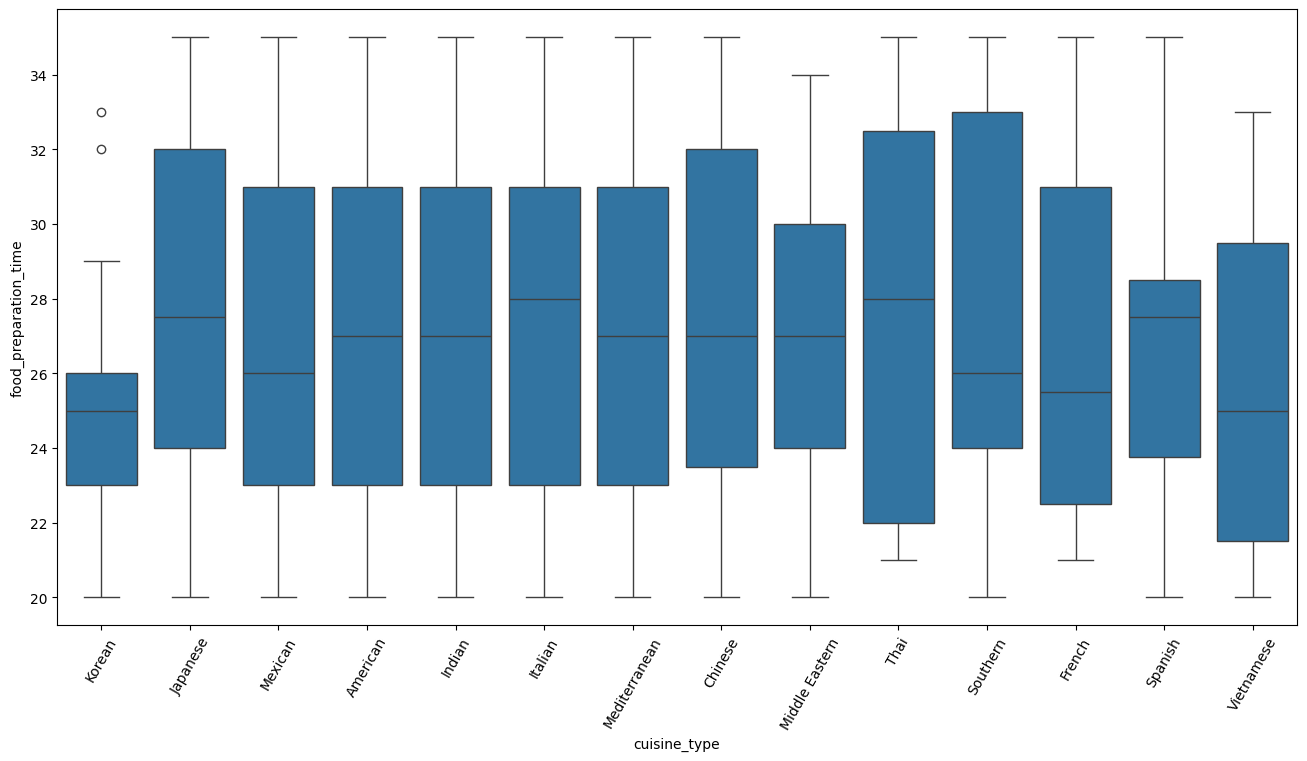

In [73]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observations: 
* Outliers are present in the food preparation time of Korean cuisine and Korean cuisine takes the least amount of time to prepare compared to the other cuisines.

#### Rating vs Delivery Time

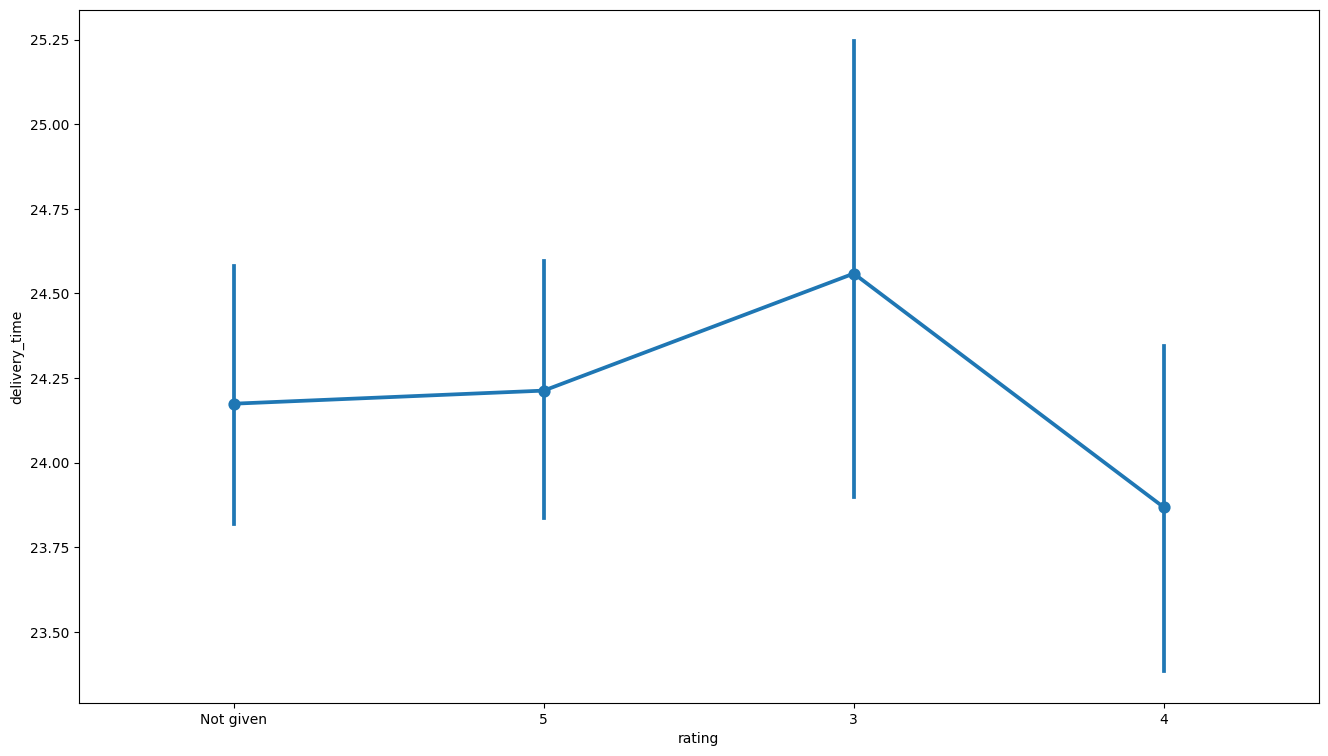

In [46]:
plt.figure(figsize=(16, 9))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations: 
* There is a possibility that longer delivery times can lead to lower ratings as the range for the lower ratings are larger than that of higher ratings. 

#### Cuisine vs Cost of the Order

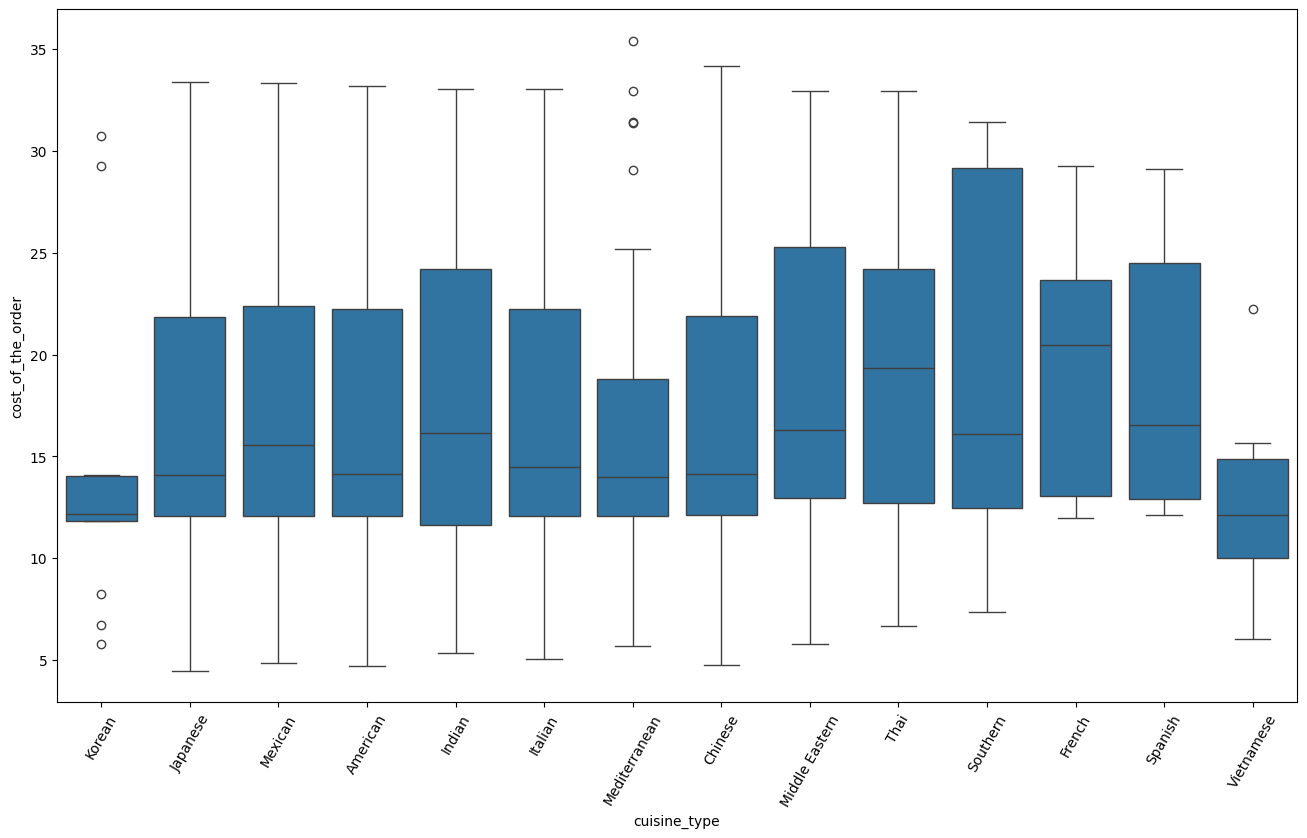

In [74]:
plt.figure(figsize=(16,9))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observations: 
* Vietnamese and Korean cuisines cost less compared to the other cuisines and outliers are present in Korean, Vietnamese, and Mediterranean cuisines. 

#### Rating vs Cost of the Order

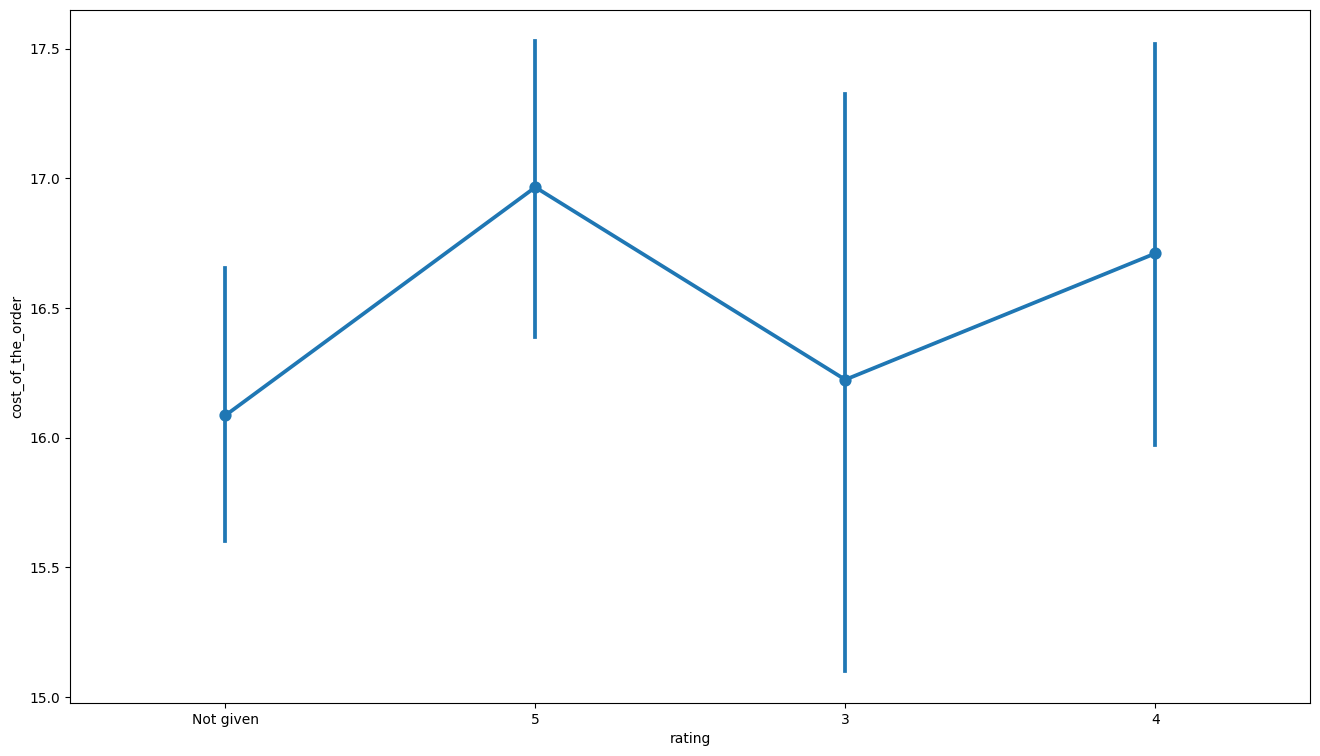

In [49]:
plt.figure(figsize=(16, 9))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations: 
* The higher cost orders are typically rated highly compared to orders of lower cost.

#### Rating vs Food Preparation Time

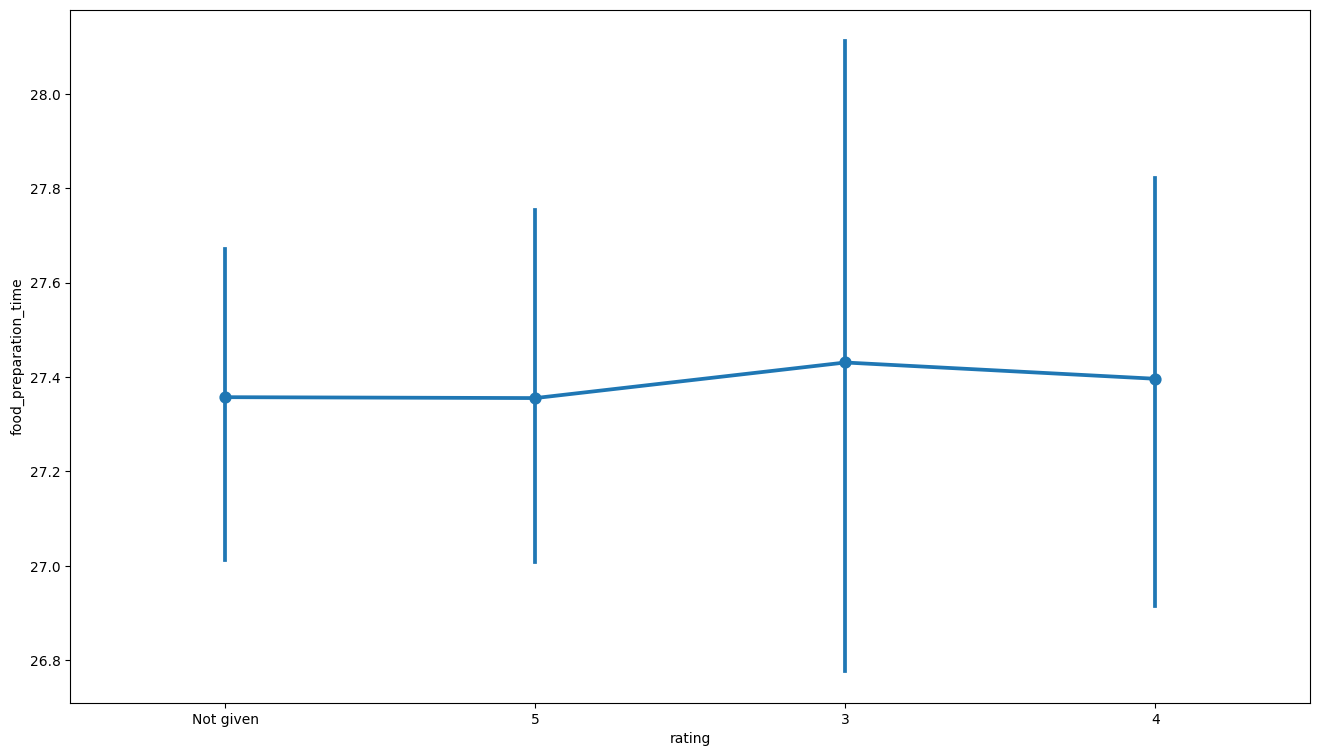

In [50]:
plt.figure(figsize=(16, 9))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations: 
* As per the point plot, it does not seem that food preparation time has an effect on the customers' rating of the order.

#### Delivery Time vs Day of the Week

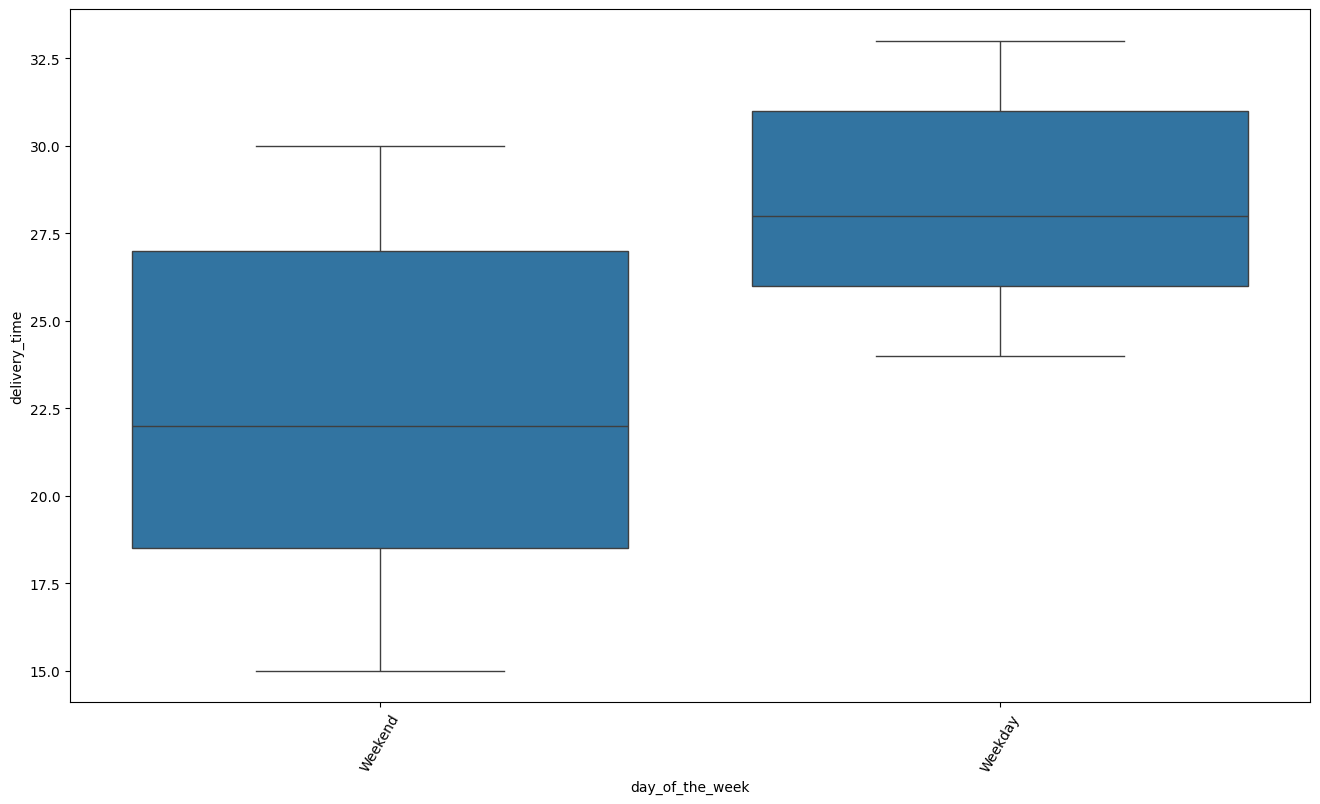

In [75]:
plt.figure(figsize=(16,9))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observations: 
* The average delivery time for orders placed on weekdays appears to be greater than the average delivery time for orders placed on the weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [53]:
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [54]:
top_rest = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
df_top_4 = df_rated[df_rated['restaurant_name'].isin(top_rest)].copy()
df_top_4.groupby(df_top_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: 
* The restaurants that fulfill the criteria to get the promotional offer are 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack' and 'Blue Ribbon Sushi'.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [55]:
def net_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(net_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [56]:
sum_rev = df['Revenue'].sum()
print('The net revenue is around', round(sum_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations: 
* The net revenue generated by the company across all orders given in the dataset is equal to 6166.3 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [59]:
df['sum_time'] = df['food_preparation_time'] + df['delivery_time']
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['sum_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations: 
* Around 10.54% of the total number of orders placed have a total delivery time of over 60 minutes. 


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [60]:
print('The mean delivery time on weekdays is equal to', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekends is equal to', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is equal to 28 minutes
The mean delivery time on weekends is equal to 22 minutes


#### Observations: 
* The mean delivery time on weekdays is equal to 28 minutes whereas the mean delivery time on weekends is equal to 22 minutes, showing that it takes longer for customers to receive their orders on weekdays when compared to weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The restaurant that receuves the highest number of orders, and therefore generates the most revenue for FoodHub is Shake Shack. 
* Food delivery time is typically longer on weekdays as compared to weekends. 
* The most popular cuisines among customers on FoodHub are American, Italian, Chinese, and Japanese cuisines which can also be found in the restaurants receiving the largest number of orders as these restaurants specialize in such cuisines. 
* Vietnamese and Korean cuisine orders typically cost less than orders from other cuisines, and Korean cuisine takes the least amount of time to prepare. 
* Restaurants on FoodHub receive more orders on the weekends when compared to the number of orders received on weekdays. 

### Recommendations:

*  As FoodHub experiences increased activity on the weekends from customers, employing more delivery employees would be beneficial in decreasing delivery times. 
* Since customer ratings can be important in assessing satisfaction of FoodHub's experience, the platform could undergo a redesign in order to make providing ratings more accessible to customers which can further improve customer satisfaction. Multiple channels for customer support can be integrated such as phone and email support options along with an in-app chat. 
* In order to address orders taking specifically long to deliver, FoodHub could offer promotions to customers experiencing such wait times in order to improve customer loyalty and satisfaction. 
* Since the most popular cuisines are found to be American, Italian, Japanese, and Chinese, FoodHub could partner with such restaurants in order to provide personalized promotions and discounts to further increase order volume. 

---